<img src="../img/AutoScout.jpg" alt="scout" style="width: 700px; display: block; margin-left: auto; margin-right: auto;"/>

In [59]:
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

# Carga del DataSet raw

In [60]:
data = pd.read_csv('../data/raw/car_prices-EU.csv')
data

,Brand,Model,Price,Country,Kilometers,Gearbox,Year,Fuel,Power,Seller,Body Type,Type,Drivetrain,Seats,Doors,Cylinders,Color,Upholstery
0,Fiat,Freemont,5100.0,IT,225282,Automatic,2013,Diesel,170.0,Dealer,Van,Used,4WD,7.0,5.0,4.0,Black,Full leather
1,Fiat,Panda,1995.0,NL,162076,Manual,2010,Gasoline,69.0,Dealer,Compact,Used,Front,4.0,5.0,4.0,Grey,Cloth
2,Fiat,Panda,2995.0,NL,53914,Manual,2006,Gasoline,60.0,Dealer,Compact,Used,Front,4.0,5.0,4.0,Black,NaN
3,Fiat,Grande Punto,1450.0,NL,238642,Manual,2006,Gasoline,95.0,Dealer,Compact,Used,Front,5.0,5.0,4.0,Black,Cloth
4,Fiat,500X,8900.0,IT,199000,Manual,2017,LPG,120.0,Dealer,Off-Road/Pick-up,Used,Front,5.0,5.0,4.0,White,Part leather
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,Corvette,C7,65000.0,DE,20064,NaN,2015,Gasoline,466.0,Private seller,Coupe,Used,NaN,2.0,3.0,NaN,Blue,Velour
12900,Corvette,C8,144900.0,AT,3500,Automatic,2021,Electric/Gasoline,503.0,Dealer,Convertible,Used,Rear,2.0,2.0,NaN,Blue,Full leather
12901,Corvette,Z06,70500.0,DE,29874,Automatic,2015,Gasoline,659.0,Dealer,Convertible,Used,NaN,2.0,2.0,NaN,Blue,Full leather
12902,Corvette,C3,21800.0,AT,85000,Manual,1971,Gasoline,277.0,Private seller,Convertible,Used,Rear,2.0,2.0,8.0,Yellow,Other


In [61]:
df = data.copy()

In [62]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12904  │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column     ┃ NA    ┃ NA %                ┃ mean  ┃ sd     ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Price      │    10 │ 0.07749535027898326 │ 35500 │  95800 │ 300 │ 12450 │ 19950 │ 29990 │ 4990000 │   █    │  │
│ │ Power      │   112 │  0.8679479231246126 │ 203.7 │  155.4 │   1 │   116 │   150 │   238 │    6751 │   █    │  │
│ │ Seats      │   607 │   4.703967761934284 │  4.89 │ 0.8253 │   1 │     5 │     5 │     5 │       9 │    ▁█  │  │
│ │ Doors      │   265 │  2.0536267823930565 │ 4.476 │ 0.9488 │   2 │     4 │     5 │     5 │      35 │   █    │  │
│ │ Cylinders  │  2743 │  21.256974581525107 │ 4.401 │  1.716 │   0 │     4 │     4 │     4 │      12 │  ▂█▁▁  │  │
│ └────────────┴───────┴─────────────────────┴───────┴────────┴─────┴───────┴───────┴───────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃          ┃           ┃          ┃ chars per ┃ words    ┃ total     ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest  ┃ min       ┃ max      ┃ row       ┃ per row  ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Brand    │    0 │        0 │ Kia      │ Mercedes │ Alfa-Rome │ Volvo    │      6.27 │        1 │     12904 │  │
│ │          │      │          │          │ -Benz    │ o         │          │           │          │           │  │
│ │ Model    │   83 │ 0.643211 │ e        │ Grand C4 │ 106       │ up!      │      5.99 │      1.2 │     15439 │  │
│ │          │      │ 40731556 │          │ SpaceTou │           │          │           │          │           │  │
│ │          │      │        1 │          │ rer      │           │          │           │          │           │  │
│ │ Country  │   10 │ 0.077495 │ IT       │ IT       │ AT        │ NL       │         2 │        1 │     12894 │  │
│ │          │      │ 35027898 │          │          │           │          │           │          │           │  │
│ │          │      │      326 │          │          │           │          │           │          │           │  │
│ │ Kilomete │  133 │ 1.030688 │ 0        │ Off-Road │ 0         │ Van      │      4.99 │     0.99 │     12773 │  │
│ │ rs       │      │ 15871047 │          │ /Pick-up │           │          │           │          │           │  │
│ │          │      │       75 │          │          │           │          │           │          │           │  │
│ │ Gearbox  │   91 │ 0.705207 │ New      │ Semi-aut │ A

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12904 entries, 0 to 12903
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       12904 non-null  object 
 1   Model       12821 non-null  object 
 2   Price       12894 non-null  float64
 3   Country     12894 non-null  object 
 4   Kilometers  12771 non-null  object 
 5   Gearbox     12813 non-null  object 
 6   Year        12429 non-null  object 
 7   Fuel        12895 non-null  object 
 8   Power       12792 non-null  float64
 9   Seller      12902 non-null  object 
 10  Body Type   12904 non-null  object 
 11  Type        12903 non-null  object 
 12  Drivetrain  9750 non-null   object 
 13  Seats       12297 non-null  float64
 14  Doors       12639 non-null  float64
 15  Cylinders   10161 non-null  float64
 16  Color       12406 non-null  object 
 17  Upholstery  11094 non-null  object 
dtypes: float64(5), object(13)
memory usage: 1.8+ MB


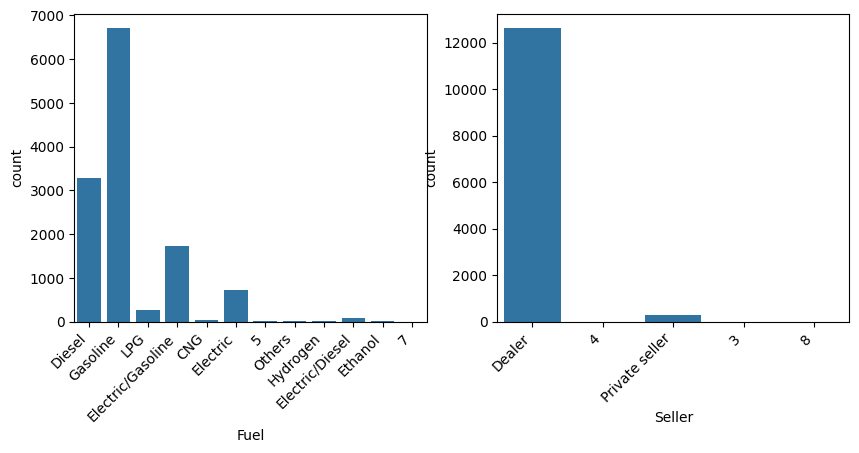

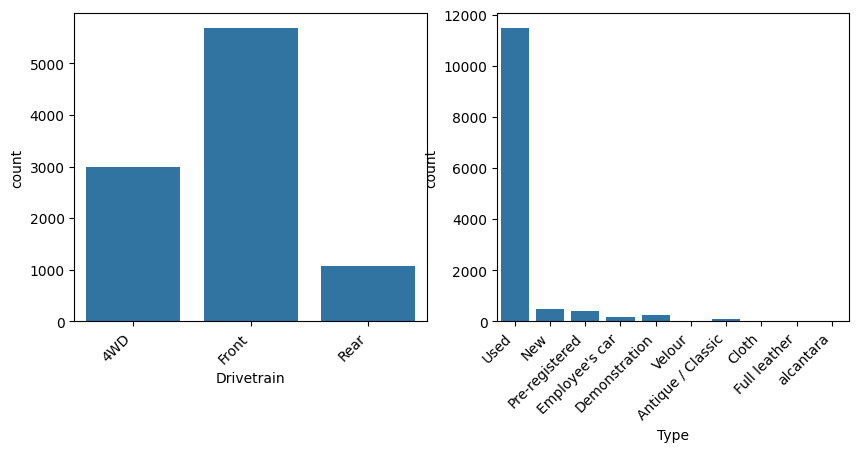

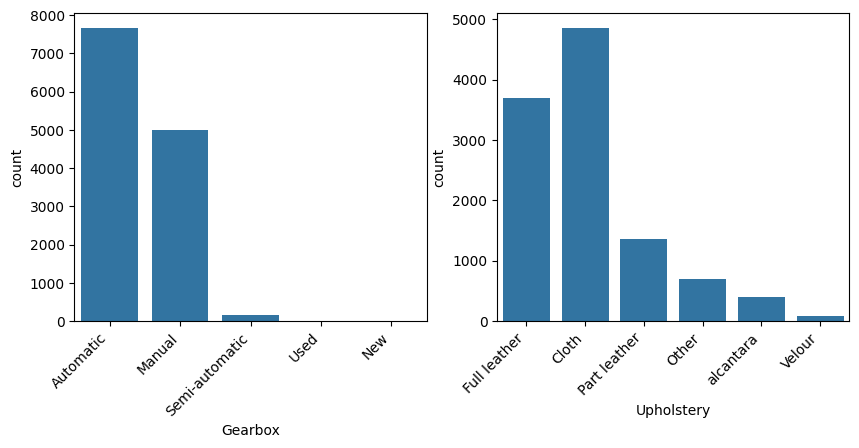

In [64]:
# Mostrar como se distribuye algunas caraceristicas de los coches
cat_cols = ['Fuel','Seller','Drivetrain','Type', 'Gearbox', 'Upholstery']
i=0
while i < 6:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45, ha='right')
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45, ha='right')
    i += 1

    
    plt.show()

### Normalizar las columnas Brand y Model
Guardar en el dataframe otra columna con valores decimales donde la parte entera coresponda a un codigo que asignamos para las marcas de coches teniendo en cuenta la frecuencia de cada marca, siendo 1 la marca más repetida y 38 la marca menos repetida, y la parte decimal que coresponda al modelo de coche de esta marca teniendo en cuenta el precio medio de estos modelos, siendo .001 el modelo más barato.

In [ ]:
# borrar las lineas que tienen NaN en modelo
df = df.dropna(subset = ['Model'])

# Calcular media del precio de cada marca
brand_counts = df.groupby('Brand')['Price'].mean().sort_values()

# Crear mapeo: precio medio menos caro → número más bajo
frequency_order = brand_counts.index.tolist()
encoding_dict = {brand: i for i, brand in enumerate(frequency_order)}

# Añadir una columna numerica para el Brand
df.insert(1, 'Brand_c' , df['Brand'].map(encoding_dict))


# Calcular precio promedio por modelo
precio_promedio_modelo = df.groupby(['Brand_c', 'Model'])['Price'].mean().reset_index()

# Normalizar precios por marca
def normalizar_por_marca(grupo):
    precio_min = grupo['Price'].min()
    precio_max = grupo['Price'].max()
    rango = precio_max - precio_min
    
    if rango > 0:
        return 0.001 + 0.998 * (grupo['Price'] - precio_min) / rango
    else:
        n = len(grupo)
        return [0.001 + i * (0.998 / (n - 1)) for i in range(n)] if n > 1 else [0.5]

precio_promedio_modelo['Model_decimal'] = precio_promedio_modelo.groupby('Brand_c')['Price'].transform(
    lambda x: normalizar_por_marca(pd.DataFrame({'Price': x}))
)

# Crear nueva columna de nr. decimales, donde la parte entera es el codigo del Brand y la parte decimal el codigo del Model
precio_promedio_modelo['Brand_Model_code'] = (precio_promedio_modelo['Brand_c'] + precio_promedio_modelo['Model_decimal'].round(3))

# Mapear al DataFrame original
codigo_map = precio_promedio_modelo.set_index(['Brand_c', 'Model'])['Brand_Model_code'].to_dict()
df['Brand_Model_code'] = df.apply(lambda r: codigo_map[(r['Brand_c'], r['Model'])], axis=1)


In [66]:
df.groupby(['Brand', 'Model'])['Price'].mean()

Brand       Model            
Alfa-Romeo  147                   3300.000000
            156                  13933.333333
            159                   5451.666667
            166                   3050.000000
            4C                   73818.000000
                                     ...     
Volvo       V90 Cross Country    27399.000000
            XC40                 27001.414286
            XC60                 28214.032258
            XC70                 18900.000000
            XC90                 39613.527778
Name: Price, Length: 846, dtype: float64

In [73]:

df[df['Brand']=='Toyota'].sort_values('Brand_Model_code')[['Brand', 'Model', 'Price', 'Brand_c', 'Brand_Model_code']].head(5)

,Brand,Model,Price,Brand_c,Brand_Model_code
4193,Toyota,iQ,4990.0,10,10.001
4146,Toyota,Corolla Verso,5999.0,10,10.004
4383,Toyota,Corolla Verso,4250.0,10,10.004
4214,Toyota,Urban Cruiser,5939.0,10,10.021
4330,Toyota,Aygo,8500.0,10,10.031


Comprobar que se ha guardado correctamente.
<br> En el siguiente ejemplo observamos que la marca Toyota se ha guardaro con el codigo 10, y el coche menos caro de esta marca tiene el codigo 10.001

In [71]:
df[df['Brand_Model_code'] == 10.001][['Brand','Brand_c','Model','Price','Brand_Model_code']]

,Brand,Brand_c,Model,Price,Brand_Model_code
4193,Toyota,10,iQ,4990.0,10.001


In [74]:
# borrar las lineas que tienen más de 3 columnas vacias
df = df[df.isna().sum(axis=1) <= 3]

# cambiar el año a 2025 y los kilometros a 0 si no existen y el coche es de tipo nuevo
df.loc[df['Year'].isna() & (df['Type'] == 'New') & (df['Kilometers'].isna()), 'Kilometers'] = 0
df.loc[df['Year'].isna() & (df['Type'] == 'New'), 'Year'] = 2025

# Borrar las lineas que no tienen año ni modelo
df = df.dropna(subset=['Year'])
df = df.dropna(subset= ['Model'])

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# Si es antiguo (<=2013) y no tiene Gearbox, asumir Manual
df.loc[df['Gearbox'].isna() & (df['Year'] <= 2013), 'Gearbox'] = 'Manual'

# Si es moderno (>2013) y no tiene Gearbox, asumir Automatic
df.loc[df['Gearbox'].isna() & (df['Year'] > 2013), 'Gearbox'] = 'Automatic'

# añadir la moda
df['Fuel'] = df['Fuel'].fillna(df['Fuel'].mode()[0])

df.loc[df['Drivetrain'].isna() & (df['Power'] <= 200), 'Drivetrain'] = 'Front'
df.loc[df['Drivetrain'].isna() & (df['Power'] > 200), 'Drivetrain'] = '4WD'
df = df.dropna(subset= ['Drivetrain'])

# sustituir NaN con la moda
df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])
df['Doors'] = df['Doors'].fillna(df['Doors'].mode()[0])
df['Upholstery'] = df['Upholstery'].fillna(df['Upholstery'].mode()[0])
df['Color'] = df['Color'].fillna(df['Color'].mode()[0])

# cambiar el tipo de la columna km de object a float
df['Kilometers'] = df['Kilometers'].astype(float)

# Transformación básica
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

In [75]:
mapping = {cat: i for i, cat in enumerate(df['Country'].value_counts().index)}
df['Country_c'] = df['Country'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Gearbox'].value_counts().index)}
df['Gearbox_c'] = df['Gearbox'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Fuel'].value_counts().index)}
df['Fuel_c'] = df['Fuel'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Seller'].value_counts().index)}
df['Seller_c'] = df['Seller'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Type'].value_counts().index)}
df['Type_c'] = df['Type'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Drivetrain'].value_counts().index)}
df['Drivetrain_c'] = df['Drivetrain'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Upholstery'].value_counts().index)}
df['Upholstery_c'] = df['Upholstery'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Color'].value_counts().index)}
df['Color_c'] = df['Color'].map(mapping)

mapping = {cat: i for i, cat in enumerate(df['Body Type'].value_counts().index)}
df['Body_Type_c'] = df['Body Type'].map(mapping)

In [76]:
# mostrar el dataset sin limite de columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df[df['Country']=='ES']

,Brand,Brand_c,Model,Price,Country,Kilometers,Gearbox,Year,Fuel,Power,Seller,Body Type,Type,Drivetrain,Seats,Doors,Cylinders,Color,Upholstery,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
368,Fiat,0,Panda,10950.0,ES,68000.0,Manual,2018,Diesel,95.0,Dealer,Compact,Used,4WD,4.0,5.0,4.0,Grey,Cloth,0.181,7,5,1,1,0,0,1,0,1,2
488,Citroen,2,C5,1300.0,ES,566000.0,Manual,2002,Diesel,109.0,Dealer,Sedan,Used,Front,5.0,5.0,4.0,Violet,Cloth,2.245,23,5,1,1,0,0,0,0,11,1
619,Citroen,2,C4,4500.0,ES,175000.0,Manual,2010,Diesel,111.0,Dealer,Van,Used,Front,7.0,5.0,4.0,Grey,Cloth,2.570,15,5,1,1,0,0,0,0,1,5
648,Citroen,2,C4 Cactus,5495.0,ES,130000.0,Manual,2014,Gasoline,82.0,Dealer,Compact,Used,Front,5.0,5.0,3.0,Yellow,Cloth,2.373,11,5,1,0,0,0,0,0,10,2
725,Citroen,2,C6,5500.0,ES,199000.0,Automatic,2007,Diesel,208.0,Dealer,Sedan,Used,Front,5.0,4.0,6.0,Grey,Cloth,2.165,18,5,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12647,Bentley,33,Azure,98000.0,ES,45200.0,Automatic,1998,Gasoline,389.0,Dealer,Convertible,Used,Rear,4.0,2.0,8.0,Blue,Cloth,33.029,27,5,0,0,0,0,2,0,3,6
12654,Bentley,33,Continental,268000.0,ES,8300.0,Automatic,2023,Gasoline,549.0,Dealer,Convertible,Used,4WD,4.0,2.0,8.0,Grey,Cloth,33.046,2,5,0,0,0,0,1,0,1,6
12657,Bentley,33,Continental,317000.0,ES,8900.0,Automatic,2023,Gasoline,659.0,Dealer,Convertible,Used,4WD,4.0,2.0,12.0,Black,Cloth,33.046,2,5,0,0,0,0,1,0,0,6
12690,Rolls-Royce,35,Phantom,170000.0,ES,108000.0,Automatic,2008,Gasoline,460.0,Dealer,Sedan,Used,Rear,5.0,4.0,12.0,Grey,Cloth,35.403,17,5,0,0,0,0,2,0,1,1


In [77]:
# Borrar las columnas no numericas e innecesarias
df = df.drop(columns=['Brand', 'Model', 'Country','Cylinders','Gearbox','Fuel','Seller','Body Type', 'Type', 'Drivetrain', 'Color', 'Upholstery', 'Power', 'Year'])

In [17]:
# Comprobamos como ha quedado el DataFrame antes de guardarlo
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12411 entries, 0 to 12903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_c           12411 non-null  int64  
 1   Price             12411 non-null  float64
 2   Kilometers        12411 non-null  float64
 3   Seats             12411 non-null  float64
 4   Doors             12411 non-null  float64
 5   Brand_Model_code  12411 non-null  float64
 6   Car_Age           12411 non-null  int64  
 7   Country_c         12411 non-null  int64  
 8   Gearbox_c         12411 non-null  int64  
 9   Fuel_c            12411 non-null  int64  
 10  Seller_c          12411 non-null  int64  
 11  Type_c            12411 non-null  int64  
 12  Drivetrain_c      12411 non-null  int64  
 13  Upholstery_c      12411 non-null  int64  
 14  Color_c           12411 non-null  int64  
 15  Body_Type_c       12411 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 1.6 MB

In [78]:
df = df.dropna()

In [79]:
df.describe()

,Brand_c,Price,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
count,12411.000000,1.241100e+04,1.241100e+04,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.000000,12411.00000,12411.000000,12411.000000
mean,15.601885,3.298163e+04,8.166189e+04,4.896785,4.499799,15.924650,7.555878,1.174925,0.419950,0.854484,0.019821,0.232536,0.467569,0.83281,1.882926,1.432036
std,9.623827,8.365175e+04,7.374818e+04,0.810824,0.927629,9.597074,7.498074,1.430789,0.516077,1.154649,0.139391,0.787027,0.646175,1.09287,2.148832,1.781800
min,0.000000,3.000000e+02,0.000000e+00,1.000000,2.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7.000000,1.199000e+04,2.550000e+04,5.000000,4.000000,7.691000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,15.000000,1.980000e+04,6.700000e+04,5.000000,5.000000,15.139000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
75%,23.000000,2.986450e+04,1.198775e+05,5.000000,5.000000,23.458000,10.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,3.000000,2.000000
max,37.000000,4.990000e+06,2.014000e+06,9.000000,35.000000,37.999000,79.000000,7.000000,2.000000,9.000000,1.000000,5.000000,2.000000,5.00000,13.000000,8.000000


In [80]:
# Guardar el DataFrame processado
df.to_csv('../data/processed/car_prices_procc.csv', index = False)

<Axes: >

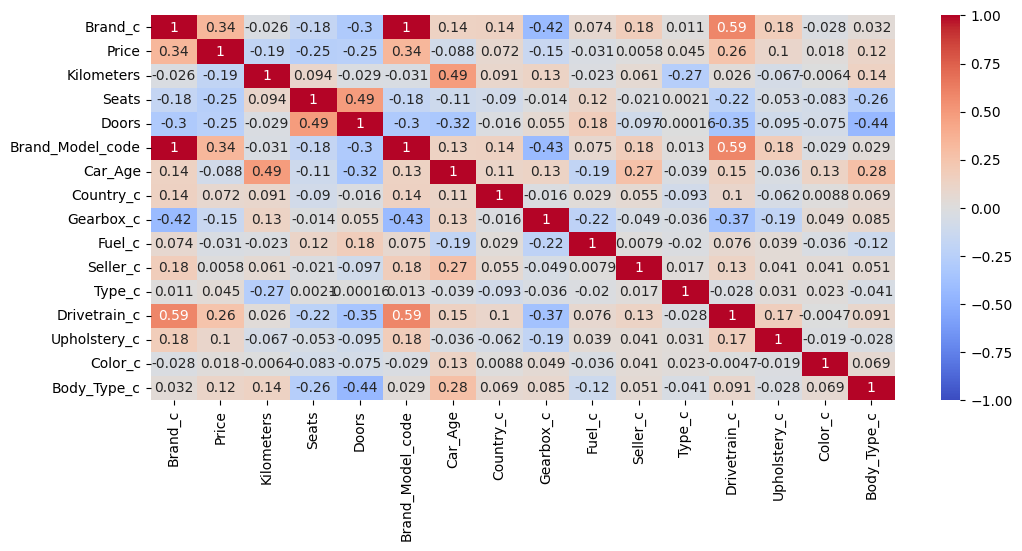

In [81]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, cmap='coolwarm')

In [83]:
df_coches_caros = df[df['Price']>60000]
df_coches_baratos = df[df['Price']<=60000]

df_coches_caros.to_csv('../data/processed/coches_caros_procc.csv', index = False)
df_coches_baratos.to_csv('../data/processed/coches_baratos_procc.csv', index = False)

<Axes: xlabel='Price', ylabel='Count'>

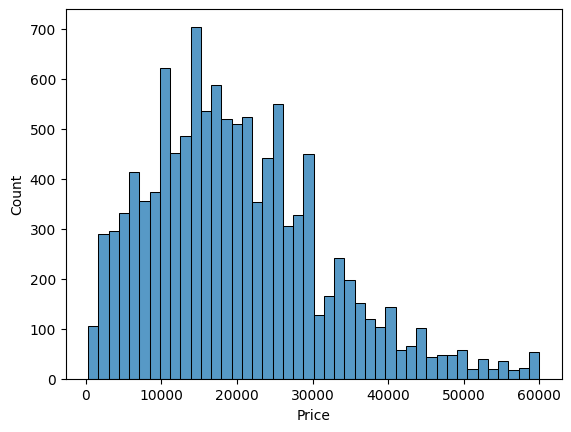

In [84]:
sns.histplot( df_coches_baratos['Price'])

<Axes: ylabel='Price'>

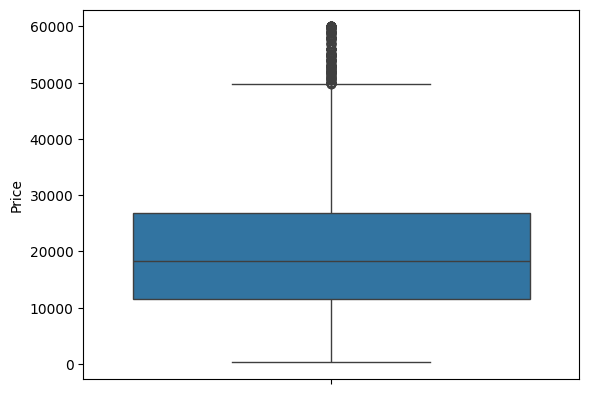

In [85]:
sns.boxplot(df_coches_baratos['Price'])

<Axes: xlabel='Price', ylabel='Count'>

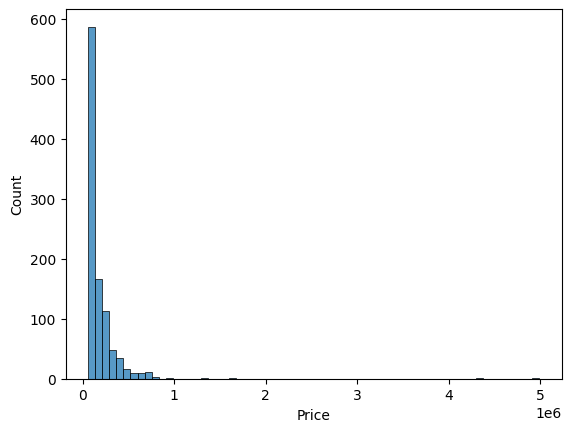

In [86]:
sns.histplot( df_coches_caros['Price'])

<Axes: ylabel='Price'>

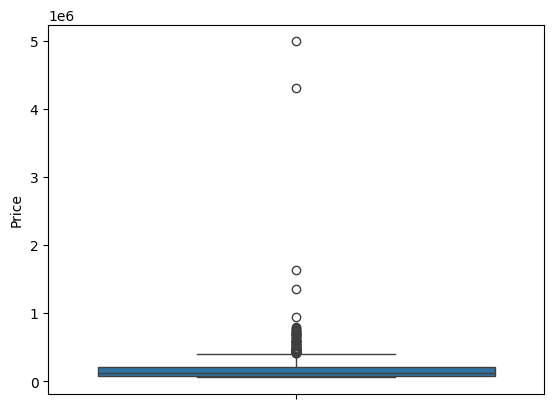

In [87]:
sns.boxplot(df_coches_caros['Price'])

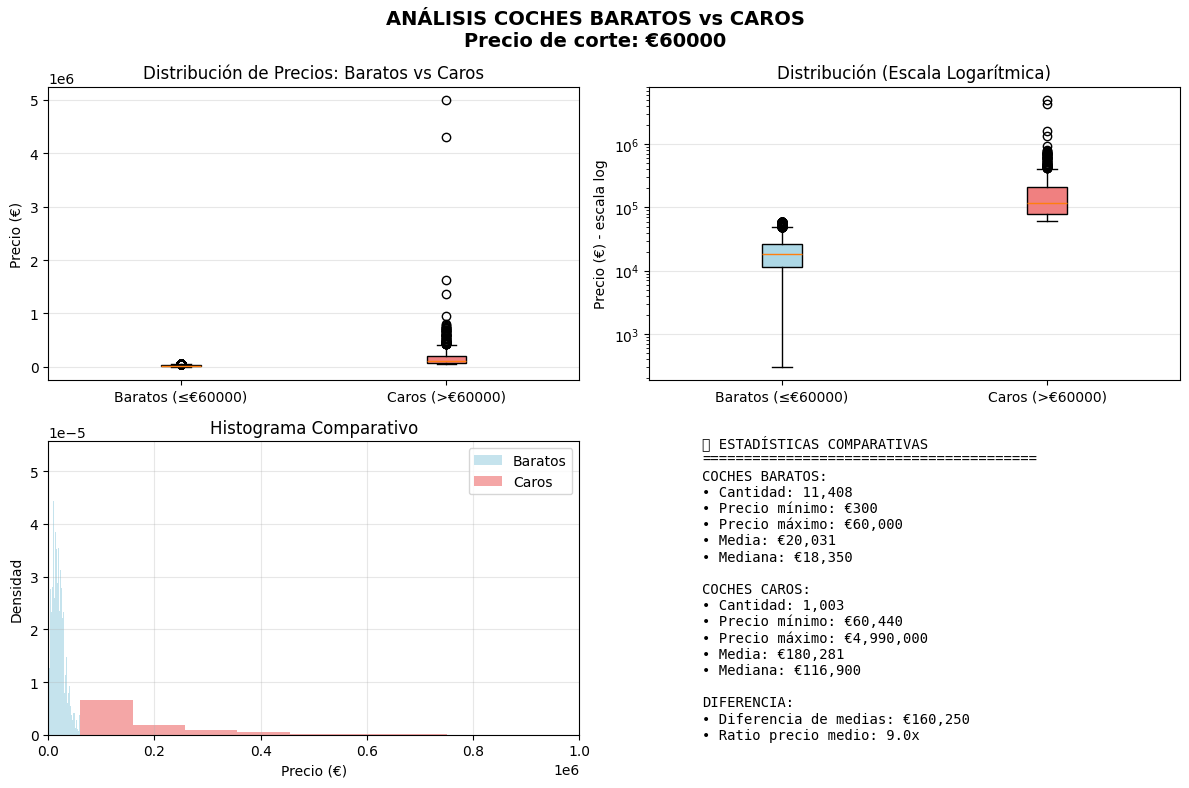

In [88]:
# BOXPLOT
plt.figure(figsize=(12, 8))

# Boxplot básico
plt.subplot(2, 2, 1)
box_data = [df_coches_baratos['Price'], df_coches_caros['Price']]
labels = [f'Baratos (≤€60000)', f'Caros (>€60000)']
box = plt.boxplot(box_data, labels=labels, patch_artist=True)

# Colores
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribución de Precios: Baratos vs Caros')
plt.ylabel('Precio (€)')
plt.grid(True, alpha=0.3, axis='y')

# Boxplot con escala logarítmica (para mejor visualización)
plt.subplot(2, 2, 2)
box_log = plt.boxplot(box_data, labels=labels, patch_artist=True)

for patch, color in zip(box_log['boxes'], colors):
    patch.set_facecolor(color)

plt.yscale('log')
plt.title('Distribución (Escala Logarítmica)')
plt.ylabel('Precio (€) - escala log')
plt.grid(True, alpha=0.3, axis='y')

# Histograma comparativo
plt.subplot(2, 2, 3)
plt.hist(df_coches_baratos['Price'], bins=50, alpha=0.7, label='Baratos', 
         color='lightblue', density=True)
plt.hist(df_coches_caros['Price'], bins=50, alpha=0.7, label='Caros', 
         color='lightcoral', density=True)
plt.xlim(0, 1000000)
plt.xlabel('Precio (€)')
plt.ylabel('Densidad')
plt.title('Histograma Comparativo')
plt.legend()
plt.grid(True, alpha=0.3)

# Estadísticas
plt.subplot(2, 2, 4)
plt.axis('off')

estadisticas_texto = (
    f"📈 ESTADÍSTICAS COMPARATIVAS\n"
    f"{'='*40}\n"
    f"COCHES BARATOS:\n"
    f"• Cantidad: {len(df_coches_baratos):,}\n"
    f"• Precio mínimo: €{df_coches_baratos['Price'].min():,.0f}\n"
    f"• Precio máximo: €{df_coches_baratos['Price'].max():,.0f}\n"
    f"• Media: €{df_coches_baratos['Price'].mean():,.0f}\n"
    f"• Mediana: €{df_coches_baratos['Price'].median():,.0f}\n"
    f"\nCOCHES CAROS:\n"
    f"• Cantidad: {len(df_coches_caros):,}\n"
    f"• Precio mínimo: €{df_coches_caros['Price'].min():,.0f}\n"
    f"• Precio máximo: €{df_coches_caros['Price'].max():,.0f}\n"
    f"• Media: €{df_coches_caros['Price'].mean():,.0f}\n"
    f"• Mediana: €{df_coches_caros['Price'].median():,.0f}\n"
    f"\nDIFERENCIA:\n"
    f"• Diferencia de medias: €{df_coches_caros['Price'].mean() - df_coches_baratos['Price'].mean():,.0f}\n"
    f"• Ratio precio medio: {df_coches_caros['Price'].mean()/df_coches_baratos['Price'].mean():.1f}x"
)

plt.text(0.1, 0.5, estadisticas_texto, fontsize=10, 
         verticalalignment='center', fontfamily='monospace')
plt.suptitle(f'ANÁLISIS COCHES BARATOS vs CAROS\nPrecio de corte: €60000', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

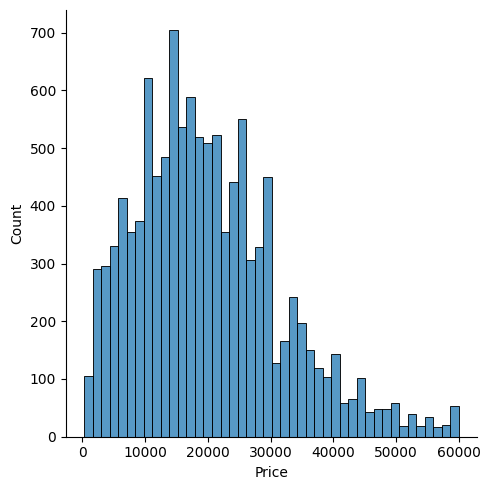

In [89]:
sns.displot(df_coches_baratos['Price']);

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12415 entries, 0 to 12903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_c           12415 non-null  int64  
 1   Price             12415 non-null  float64
 2   Kilometers        12415 non-null  float64
 3   Year              12415 non-null  int64  
 4   Seats             12415 non-null  float64
 5   Doors             12415 non-null  float64
 6   Brand_Model_code  12415 non-null  float64
 7   Country_c         12415 non-null  int64  
 8   Gearbox_c         12415 non-null  int64  
 9   Fuel_c            12415 non-null  int64  
 10  Seller_c          12415 non-null  int64  
 11  Type_c            12415 non-null  int64  
 12  Drivetrain_c      12411 non-null  float64
 13  Upholstery_c      12415 non-null  int64  
 14  Color_c           12415 non-null  int64  
 15  Body_Type_c       12415 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 1.6 MB